In [1]:
# File to load 
file_to_load = './steam_games.csv'

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [3]:
games_features = pd.read_csv(file_to_load)

#games_features

In [4]:
games_data = pd.concat([games_features,games_features["popular_tags"].str.get_dummies(sep=',')], 1)

In [5]:
print(games_data.columns)

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       ...
       'Warhammer 40K', 'Web Publishing', 'Werewolves', 'Western', 'Word Game',
       'World War I', 'World War II', 'Wrestling', 'Zombies', 'e-sports'],
      dtype='object', length=396)


In [6]:
#games_data.columns.tolist()

In [7]:
#games_data

In [8]:
# Get the sum of each column 
tag_sums = games_data.sum()

In [9]:
tag_sums = tag_sums.to_frame()

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
#tag_sums

In [12]:
tag_sums = tag_sums.drop(['url'])

In [13]:
#tag_sums

In [14]:
tag_sums = tag_sums.sort_values(by=0)

In [15]:
#tag_sums

In [16]:
unwanted_columns = tag_sums[tag_sums[0] < 100]

In [17]:
#unwanted_columns

In [18]:
unwanted_columns.index

Index(['Skiing', 'Asymmetric VR', 'Snow', 'BMX', 'Snowboarding', 'ATV', 'Jet',
       'Feature Film', 'Skating', 'Foreign',
       ...
       'Politics', 'Dragons', 'Battle Royale', 'Runner', 'Psychedelic',
       'Ninja', 'Political', 'Noir', 'Dungeons & Dragons', 'Dark Comedy'],
      dtype='object', length=152)

In [19]:
games_data = games_data.drop(columns = unwanted_columns.index, axis = 1)

In [20]:
games_data.columns.tolist()

['url',
 'types',
 'name',
 'desc_snippet',
 'recent_reviews',
 'all_reviews',
 'release_date',
 'developer',
 'publisher',
 'popular_tags',
 'game_details',
 'languages',
 'achievements',
 'genre',
 'game_description',
 'mature_content',
 'minimum_requirements',
 'recommended_requirements',
 'original_price',
 'discount_price',
 '1980s',
 "1990's",
 '2.5D',
 '2D',
 '2D Fighter',
 '3D',
 '3D Platformer',
 '4 Player Local',
 '4X',
 'Abstract',
 'Action',
 'Action RPG',
 'Action-Adventure',
 'Addictive',
 'Adventure',
 'Aliens',
 'Alternate History',
 'Animation & Modeling',
 'Anime',
 'Arcade',
 'Arena Shooter',
 'Atmospheric',
 'Audio Production',
 'Base Building',
 "Beat 'em up",
 'Beautiful',
 'Blood',
 'Board Game',
 'Building',
 'Bullet Hell',
 'CRPG',
 'Card Game',
 'Cartoon',
 'Cartoony',
 'Casual',
 'Character Customization',
 'Choices Matter',
 'Choose Your Own Adventure',
 'City Builder',
 'Classic',
 'Clicker',
 'Co-op',
 'Colorful',
 'Comedy',
 'Competitive',
 'Controller',


In [21]:
#games_data.tail(10)

In [22]:
game_data_filtered = games_data.loc[:, '1980s':'Zombies']

In [23]:
#game_data_filtered.head(10)

In [24]:
game_data_name_attribute = games_data.loc[:, 'name':'name']

In [25]:
#game_data_name_attribute.head(10)

In [26]:
mergedDf = game_data_name_attribute.merge(game_data_filtered, left_index=True, right_index=True)

In [27]:
#mergedDf.head(10)

In [28]:
popular_tag_name_attribute = games_data.loc[:, 'popular_tags':'popular_tags']

In [29]:
merged_data_frame = popular_tag_name_attribute.merge(mergedDf, left_index=True, right_index=True)

In [30]:
#merged_data_frame.head(10)

In [31]:
merged_data_frame['name'] = merged_data_frame['name'].str.upper()

In [32]:
#merged_data_frame.to_csv(r'./Mock Data.csv')

In [33]:
# File to load 
file_to_load = './jvc.csv'

In [34]:
video_game_sales = pd.read_csv(file_to_load)

#video_game_sales

In [35]:
video_game_sales = video_game_sales[['game_en', 'platform', 'website_rating']]

In [36]:
#video_game_sales.head(10)

In [37]:
video_game_sales = video_game_sales.dropna()

In [38]:
# Only keeping PC Games
video_game_sales = video_game_sales[video_game_sales['platform'] == 'PC']

In [39]:
#video_game_sales.head()

In [40]:
video_game_sales = video_game_sales.rename(columns = {'game_en':'name'})

In [41]:
#video_game_sales.head()

In [42]:
video_game_sales['name'] = video_game_sales['name'].str.upper()

In [43]:
video_game_sales.shape

(4255, 3)

In [44]:
newly_merged_dataframe = pd.merge(video_game_sales, merged_data_frame, on="name")

In [45]:
#newly_merged_dataframe.to_csv(r'./Mock Data.csv')

In [46]:
#newly_merged_dataframe.head(10)

In [47]:
newly_merged_dataframe.shape

(963, 228)

In [48]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace(' ', '_')

In [49]:
#newly_merged_dataframe.head()

In [50]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace("'", '')

In [51]:
#newly_merged_dataframe.head()

In [52]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace("&", 'and')

In [53]:
#newly_merged_dataframe.head()

In [54]:
newly_merged_dataframe = newly_merged_dataframe.drop(['platform'], axis = 1)

In [55]:
#newly_merged_dataframe.to_csv(r'./Mock_Data2.csv')

In [56]:
#newly_merged_dataframe.head()

In [57]:
newly_merged_dataframe = newly_merged_dataframe.rename(columns = {"1980s": "Tag_1980s",
                                                                  "1990s": "Tag_1990s",
                                                                  "2.5D": "Tag_2_5D",
                                                                  "2D": "Tag_2D", 
                                                                  "2D_Fighter": "Tag_2D_Fighter",
                                                                  "3D": "Tag_3D",
                                                                  "3D_Platformer": "Tag_3D_Platformer",
                                                                  "4_Player_Local": "Tag_4_Player_Local",
                                                                  "4X": "Tag_4X"})

In [58]:
newly_merged_dataframe.head()

,name,website_rating,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast-Paced,Female_Protagonist,Fighting,First-Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand-drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co-Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co-Op,Open_World,Otome,Parkour,Party-Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post-apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real-Time,Real-Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team-Based,Text-Based,Third_Person,Third-Person_Shooter,Thriller,Time_Management,Top-Down,Top-Down_Shooter,Touch-Friendly,Tower_Defense,Trains,Turn-Based,Turn-Based_Combat,Turn-Based_Strategy,Turn-Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,60 SECONDS!,14/20,"Survival,Post-apocalyptic,Singleplayer,Strateg...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7 WONDERS II,12/20,"Casual,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7 WONDERS OF THE ANCIENT WORLD,6/20,"Casual,Strategy,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [59]:
newly_merged_dataframe.dtypes

name                         object
website_rating               object
popular_tags                 object
Tag_1980s                     int64
Tag_1990s                     int64
Tag_2_5D                      int64
Tag_2D                        int64
Tag_2D_Fighter                int64
Tag_3D                        int64
Tag_3D_Platformer             int64
Tag_4_Player_Local            int64
Tag_4X                        int64
Abstract                      int64
Action                        int64
Action_RPG                    int64
Action-Adventure              int64
Addictive                     int64
Adventure                     int64
Aliens                        int64
Alternate_History             int64
Animation_and_Modeling        int64
Anime                         int64
Arcade                        int64
Arena_Shooter                 int64
Atmospheric                   int64
Audio_Production              int64
Base_Building                 int64
Beat_em_up                  

In [60]:
newly_merged_dataframe["website_rating"] = newly_merged_dataframe["website_rating"].str.split('/')

In [61]:
newly_merged_dataframe.head()

,name,website_rating,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast-Paced,Female_Protagonist,Fighting,First-Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand-drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co-Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co-Op,Open_World,Otome,Parkour,Party-Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post-apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real-Time,Real-Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team-Based,Text-Based,Third_Person,Third-Person_Shooter,Thriller,Time_Management,Top-Down,Top-Down_Shooter,Touch-Friendly,Tower_Defense,Trains,Turn-Based,Turn-Based_Combat,Turn-Based_Strategy,Turn-Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,60 SECONDS!,"[14, 20]","Survival,Post-apocalyptic,Singleplayer,Strateg...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7 WONDERS II,"[12, 20]","Casual,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7 WONDERS OF THE ANCIENT WORLD,"[6, 20]","Casual,Strategy,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [62]:
newly_merged_dataframe["website_rating"] = newly_merged_dataframe["website_rating"].infer_objects()

In [63]:
newly_merged_dataframe.head()

,name,website_rating,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast-Paced,Female_Protagonist,Fighting,First-Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand-drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co-Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co-Op,Open_World,Otome,Parkour,Party-Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post-apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real-Time,Real-Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team-Based,Text-Based,Third_Person,Third-Person_Shooter,Thriller,Time_Management,Top-Down,Top-Down_Shooter,Touch-Friendly,Tower_Defense,Trains,Turn-Based,Turn-Based_Combat,Turn-Based_Strategy,Turn-Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,60 SECONDS!,"[14, 20]","Survival,Post-apocalyptic,Singleplayer,Strateg...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7 WONDERS II,"[12, 20]","Casual,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7 WONDERS OF THE ANCIENT WORLD,"[6, 20]","Casual,Strategy,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [64]:
#newly_merged_dataframe.to_csv(r'./Mock_Data2.csv')

In [65]:
newly_merged_dataframe["website_rating"] = newly_merged_dataframe["website_rating"].map(lambda x: x[0])

In [66]:
newly_merged_dataframe.head()

,name,website_rating,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast-Paced,Female_Protagonist,Fighting,First-Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand-drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co-Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co-Op,Open_World,Otome,Parkour,Party-Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post-apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real-Time,Real-Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team-Based,Text-Based,Third_Person,Third-Person_Shooter,Thriller,Time_Management,Top-Down,Top-Down_Shooter,Touch-Friendly,Tower_Defense,Trains,Turn-Based,Turn-Based_Combat,Turn-Based_Strategy,Turn-Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,60 SECONDS!,14,"Survival,Post-apocalyptic,Singleplayer,Strateg...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7 WONDERS II,12,"Casual,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7 WONDERS OF THE ANCIENT WORLD,6,"Casual,Strategy,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
newly_merged_dataframe["website_rating"] = newly_merged_dataframe["website_rating"].astype(int)

In [68]:
newly_merged_dataframe["website_rating"] = 5 * newly_merged_dataframe["website_rating"]

In [69]:
newly_merged_dataframe.head()

,name,website_rating,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast-Paced,Female_Protagonist,Fighting,First-Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand-drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co-Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co-Op,Open_World,Otome,Parkour,Party-Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post-apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real-Time,Real-Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team-Based,Text-Based,Third_Person,Third-Person_Shooter,Thriller,Time_Management,Top-Down,Top-Down_Shooter,Touch-Friendly,Tower_Defense,Trains,Turn-Based,Turn-Based_Combat,Turn-Based_Strategy,Turn-Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,60 SECONDS!,70,"Survival,Post-apocalyptic,Singleplayer,Strateg...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7 WONDERS II,60,"Casual,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7 WONDERS OF THE ANCIENT WORLD,30,"Casual,Strategy,Puzzle,Match 3,Singleplayer",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

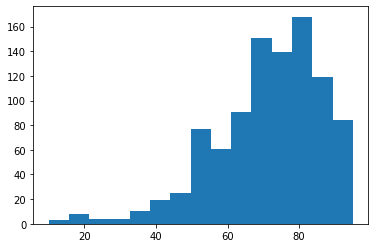

In [70]:
plt.hist(newly_merged_dataframe["website_rating"], bins = 15)
plt.show()

In [71]:
#newly_merged_dataframe.to_csv(r'./Mock_Data2.csv', index = False)

In [74]:
newly_merged_dataframe.duplicated(subset=["name"])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70      True
71     False
72     False
73     False
74     False
75     False
76     False